<a href="https://colab.research.google.com/github/fxrdhan/Tubes_AI_Kelompok-1_Bike-Sharing-Demand-Predictor/blob/main/Seoul_Bike_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Demand Prediction**

**Tugas Besar AI - Linear Regression**

Dataset: [Seoul Bike Sharing Demand (UCI ML Repository)](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

## **1. Pendahuluan**

### 1.1 Latar Belakang

Sistem bike sharing merupakan layanan penyewaan sepeda yang dapat memberikan akses ke siapapun untuk menyewa sepeda dari satu tempat dan mengembalikannya ke tempat titik parkir lain yang tersedia. Sistem ini telah ada dan makin banyak berada di kota-kota besar, serta sudah teradopsi di lingkungan kampus seperti Telkom Univeristy Bandung melalui layanan mikromobilitas Beam dengan menawarkan transportasi yang fleksibel dan ramah lingkungan juga mendukung konsep green campus.

Meskipun populer, terdapat salah satu tantangan dalam mengelola sistem bike sharing adalah ketidakseimbangan terkait ketersediaan sepeda dalam memenuhi permintaan pengguna di suatu titik lokasi. Hal ini dapat mengakibatkan kekurangan dan penumpukan jumlah sepeda yang terjadi pada titik lokasi yang berbeda. Maka dari itu diperlukan sebuah solusi untuk memprediksi jumlah penyewaan sepeda untuk meningkatkan efektifitas redistribusi sepeda yang lebih seimbang.

Mengingat kebutuhannya tidak hanya dalam memprediksi jumlah, tetapi juga memahami seberapa besar pengaruh setiap variabel terhadap permintaan, metode Regresi Linear Berganda dipilih. Metode ini memiliki keunggulan dalam hal interpretabilitas model, sehingga pengelola dapat memahami secara kuantitatif dampak perubahan variabel terhadap lonjakan pengguna.

Digunakanlah dataset Seoul Bike Sharing Demand dari UCI Machine Learning Repository sebagai studi kasus utama pada tugas besar kami. Dataset ini dipilih berdasarkan pada kelengkapan fitur cuaca yang detail dan semua masih dalam bentuk data mentah yang belum melewati tahap preprocessing data, sehingga memungkinkan untuk menganalisis dampak variabel fisik secara riil. Proyek ini bertujuan untuk membangun model regresi dalam memprediksi jumlah penyewaan sepeda serta memodelkan hubungan faktor-faktor cuaca dan waktu yang menjadi pengaruh jumlah penyewaan.

### 1.2 Rumusan Masalah

Berdasarkan latar belakang yang telah diuraikan, rumusan masalah dalam proyek ini adalah sebagai berikut:

1. Faktor-faktor apa saja yang mempengaruhi jumlah penyewaan sepeda pada sistem bike sharing?
2. Bagaimana membangun model prediksi jumlah penyewaan sepeda menggunakan algoritma Multiple Linear Regression berdasarkan data kondisi cuaca dan waktu?
3. Seberapa baik performa model Multiple Linear Regression dalam memprediksi jumlah penyewaan sepeda, dan apa saja limitasi yang ditemukan?

### 1.3 Tujuan

Tujuan dari proyek ini adalah:

1. Mengidentifikasi variabel-variabel mana yang memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda berdasarkan analisis statistik.

2. Membangun model Regresi Linear Berganda untuk memprediksi jumlah penyewaan sepeda dengan mempertimbangkan beberapa asumsi yang mendasari metode tersebut.

3. Mengevaluasi performa model menggunakan metrik evaluasi regresi.

4. Hasil analisis dapat menjadi referensi bagi operator dalam merencanakan distribusi sepeda berdasarkan kondisi cuaca dan waktu, serta mengantisipasi fluktuasi permintaan pada periode tertentu.

---
## **2. Pengumpulan Data**

In [286]:
!pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', None)

In [287]:
dataset = fetch_ucirepo(id=560)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


---
## **3. Pemahaman Data**

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [289]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [290]:
df.isnull().sum().to_frame('missing_count')

,missing_count
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


**Info:**
- Dataset memiliki 8760 entries dan 14 kolom tanpa missing values
- 4 kolom kategorikal (Date, Seasons, Holiday, Functioning Day) dan 10 kolom numerik
- Kolom `Date` tidak relevan untuk model prediksi yang nanti akan dihapus

In [291]:
# Cek duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()

Jumlah data duplikat: 0


Dataset tidak memiliki data duplikat sehingga tidak perlu dilakukan penghapusan data duplikat.

---
## **4. Analisis Data Eksploratif (EDA)**

Sebelum melakukan pemodelan, perlu dilakukan eksplorasi data untuk memahami karakteristik dan pola yang terkandung di dalamnya. Analisis data eksploratif bertujuan untuk mengidentifikasi distribusi variabel target, mendeteksi keberadaan outlier, menganalisis korelasi antar variabel, serta menemukan insight yang dapat mengarahkan proses feature engineering dan pemilihan model.
Tahapan EDA dalam proyek ini meliputi: (1) analisis distribusi variabel target (Rented Bike Count), (2) deteksi dan penanganan outlier, (3) analisis korelasi antar fitur numerik, dan (4) eksplorasi pola penyewaan berdasarkan variabel temporal dan kategorikal.


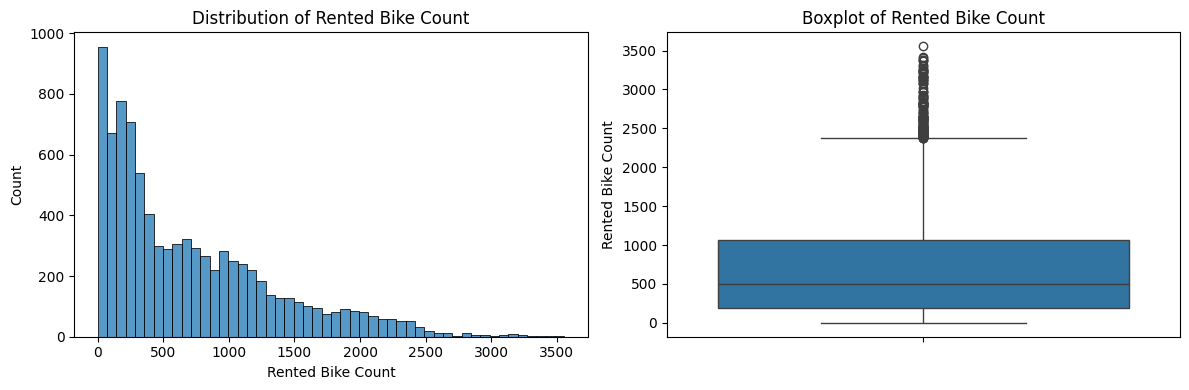

In [292]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Rented Bike Count'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Rented Bike Count')

sns.boxplot(y=df['Rented Bike Count'], ax=axes[1])
axes[1].set_title('Boxplot of Rented Bike Count')
plt.tight_layout()
plt.show()

### 4.1. Deteksi Outlier

Deteksi outlier dilakukan menggunakan metode Interquartile Range (IQR). Metode ini mengidentifikasi nilai-nilai ekstrem berdasarkan sebaran data pada kuartil. Faktor pengali 1.5 merupakan konvensi standar yang diperkenalkan oleh John Tukey (1977) dalam metode boxplot.

### Formulasi Matematis

Diberikan dataset $X = \{x_1, x_2, ..., x_n\}$, maka:

**Kuartil Pertama (Q1)**
$$Q_1 = P_{25}(X)$$

**Kuartil Ketiga (Q3)**
$$Q_3 = P_{75}(X)$$

**Interquartile Range**
$$IQR = Q_3 - Q_1$$

**Batas Bawah (Lower Bound)**
$$L_b = Q_1 - 1.5 \times IQR$$

**Batas Atas (Upper Bound)**
$$U_b = Q_3 + 1.5 \times IQR$$

**Kriteria Outlier**

Suatu observasi $x_i$ dikategorikan sebagai outlier jika dan hanya jika:

$$x_i < L_b \quad \lor \quad x_i > U_b$$

atau dalam notasi himpunan:

$$\text{Outliers} = \{x_i \in X \mid x_i < (Q_1 - 1.5 \cdot IQR) \lor x_i > (Q_3 + 1.5 \cdot IQR)\}$$


In [293]:
# Hitung statistik
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
median = df['Rented Bike Count'].median()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [294]:
print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Batas bawah outlier: {lower_bound}")
print(f"Batas atas outlier: {upper_bound}")

outliers = df[(df['Rented Bike Count'] < lower_bound) | (df['Rented Bike Count'] > upper_bound)]
print(f"\nJumlah outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Q1 (25%): 191.0
Q3 (75%): 1065.25
IQR: 874.25
Batas bawah outlier: -1120.375
Batas atas outlier: 2376.625

Jumlah outlier: 158 (1.80%)


Berdasarkan perhitungan di atas, batas atas outlier ditemukan pada nilai 2376.625. Data dengan jumlah penyewaan di atas batas tersebut secara statistik dikategorikan sebagai outlier, dengan total 158 observasi atau 1.80% dari keseluruhan data.

Berdasarkan domain knowledge, kami menghipotesiskan bahwa nilai-nilai ekstrem tersebut bukan noise, melainkan peak demand yang penting. Oleh karena itu, untuk sementara data ini akan dipertahankan pada pemodelan baseline. Validasi empiris apakah outlier ini perlu dihapus atau tidak akan dilakukan melalui Analisis Sensitivitas setelah pemodelan awal.

### 4.2. Korelasi Semua Fitur

Analisis korelasi dilakukan untuk mengidentifikasi hubungan linear antar variabel numerik. Matriks korelasi divisualisasikan menggunakan heatmap untuk memudahkan identifikasi pasangan variabel dengan korelasi tinggi yang berpotensi menyebabkan multikolinearitas.

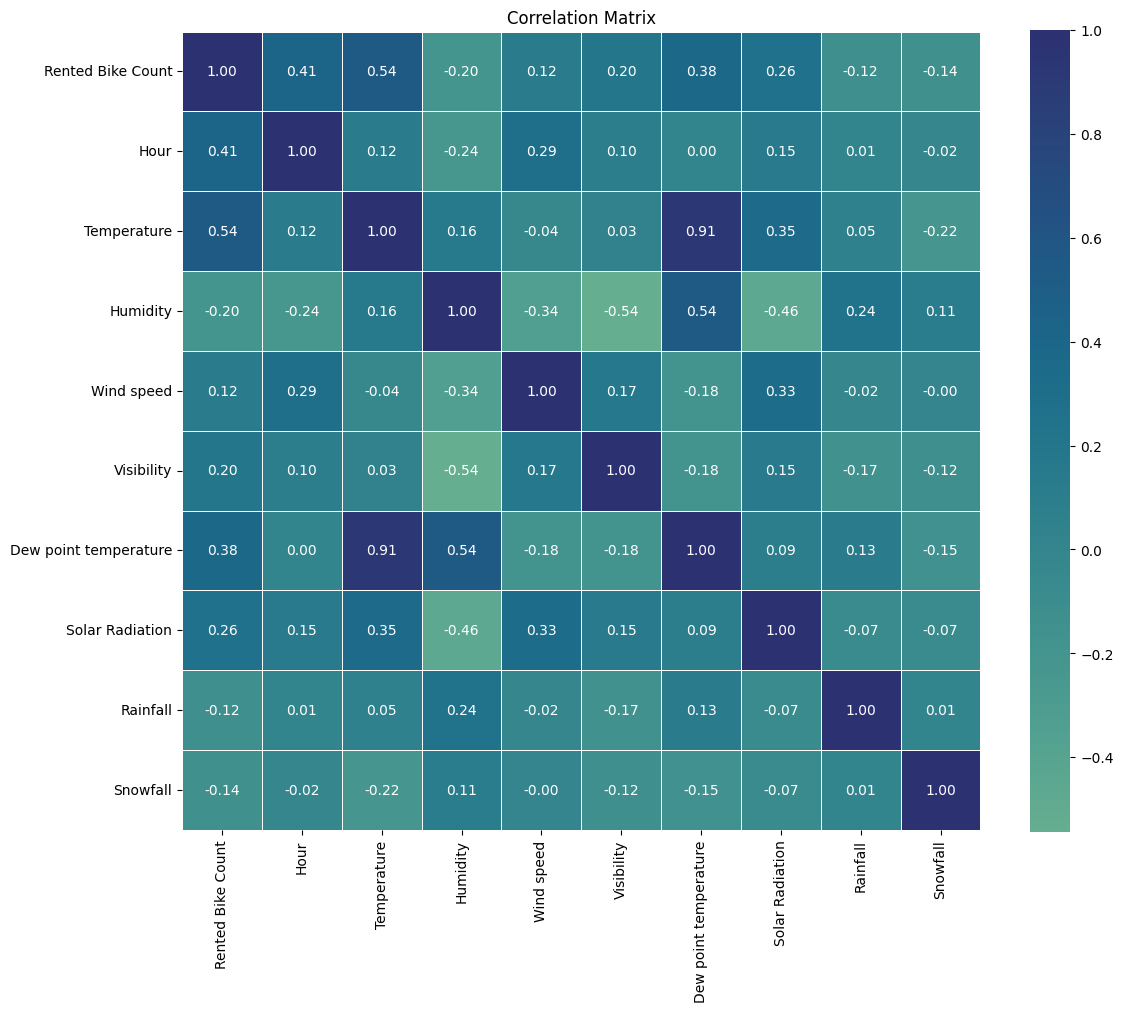

In [295]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Temperature & Dew Point memiliki korelasi tinggi (0.91)**

Korelasi 0.91 menunjukkan kedua variabel memberikan informasi hampir identik. Menyimpan keduanya akan menyebabkan multikolinearitas yang dapat mengganggu performa model. Cukup pertahankan `Temperature` karena lebih fundamental, sementara `Dew point temperature` dapat dihapus.

### 4.3. Korelasi Fitur dengan Target

Untuk menentukan fitur mana yang paling relevan sebagai prediktor, dilakukan analisis korelasi antara setiap fitur dengan variabel target (Rented Bike Count). Fitur dengan korelasi tinggi terhadap target berpotensi menjadi prediktor yang kuat dalam model regresi.

In [296]:
corr_matrix['Rented Bike Count'].sort_values(ascending=False).to_frame('correlation')

,correlation
Rented Bike Count,1.000000
Temperature,0.538558
Hour,0.410257
Dew point temperature,0.379788
Solar Radiation,0.261837
Visibility,0.199280
Wind speed,0.121108
Rainfall,-0.123074
Snowfall,-0.141804
Humidity,-0.199780


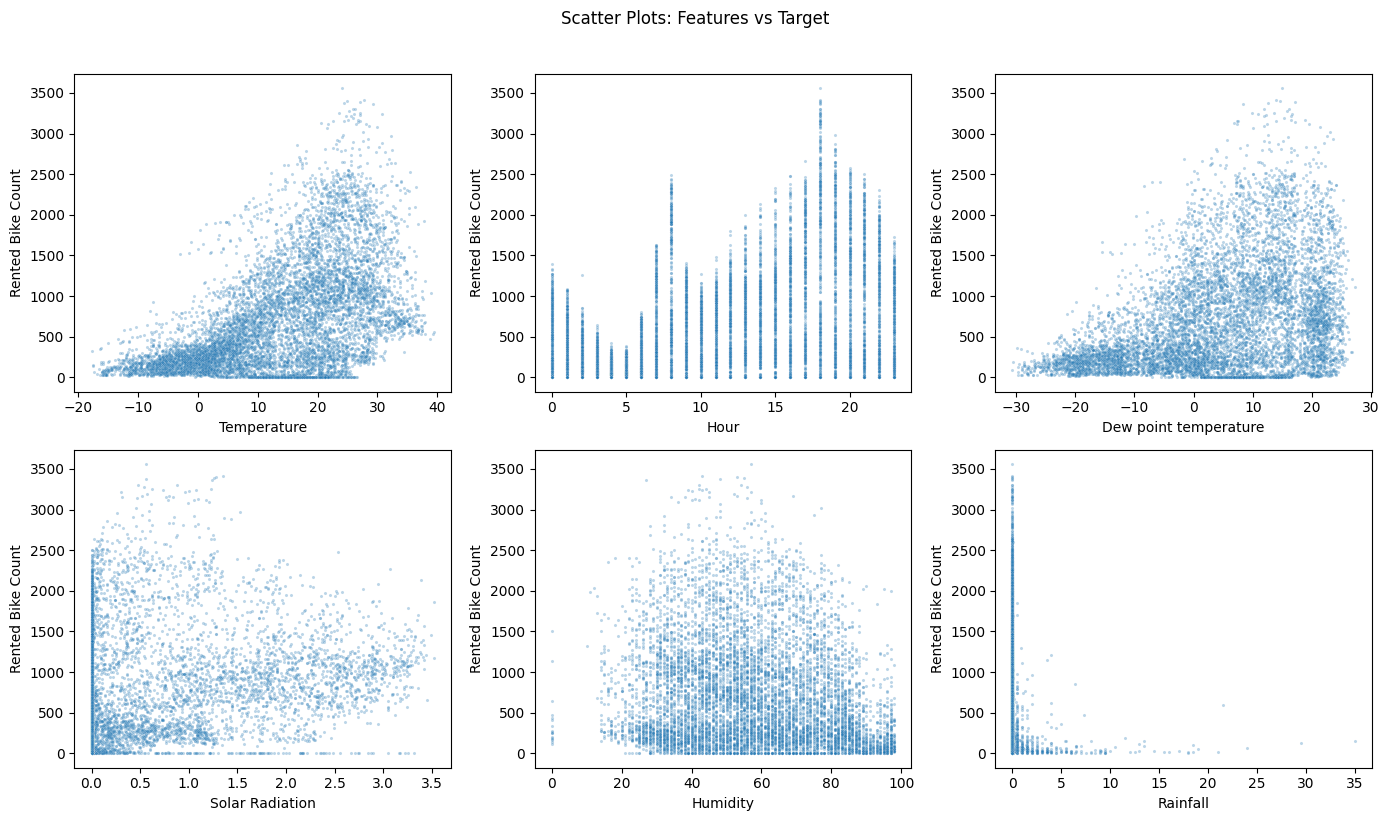

In [297]:
top_features = ['Temperature', 'Hour', 'Dew point temperature',
                'Solar Radiation', 'Humidity', 'Rainfall']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for idx, feat in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(data=df, x=feat, y='Rented Bike Count',
                    alpha=0.3, s=5, ax=ax)
plt.suptitle('Scatter Plots: Features vs Target', y=1.02)
plt.tight_layout()
plt.show()

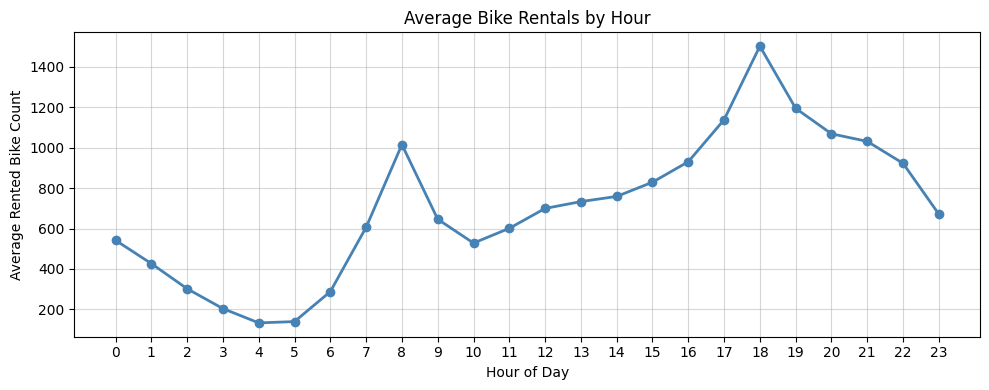

In [298]:
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg['Hour'], hourly_avg['Rented Bike Count'],
         marker='o', linewidth=2, markersize=6, color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bike Rentals by Hour')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Suhu memiliki korelasi positif terkuat (0,54) dengan jumlah penyewaan sepeda, sementara kelembaban berkorelasi negatif (-0,20) yang berarti kelembaban tinggi cenderung menurunkan penyewaan. Untuk variabel jam, terdapat pola non-linear di mana penyewaan tertinggi terjadi pada jam 8 pagi dan jam 6 sore, yang mencerminkan jam-jam sibuk aktivitas kerja.

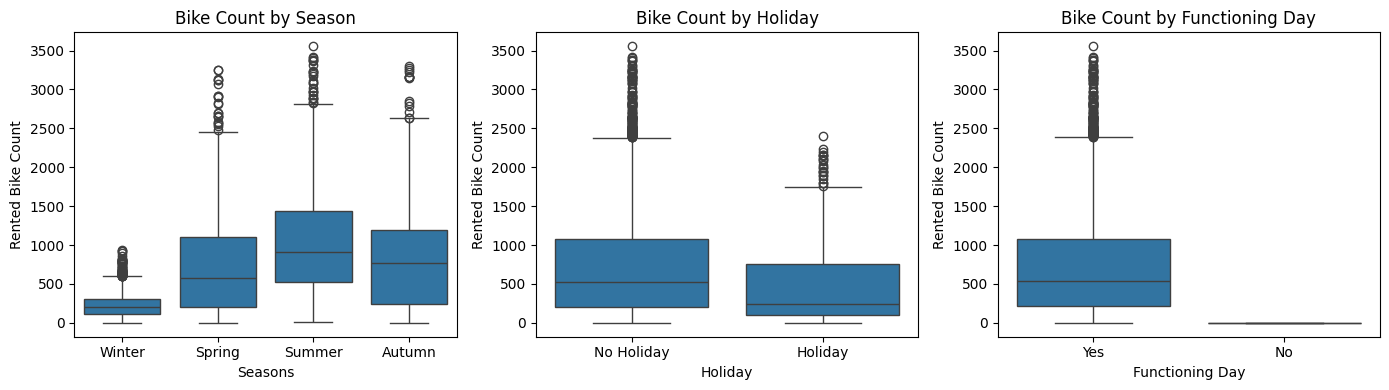

In [299]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', ax=axes[0])
axes[0].set_title('Bike Count by Season')

sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', ax=axes[1])
axes[1].set_title('Bike Count by Holiday')

sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=axes[2])
axes[2].set_title('Bike Count by Functioning Day')

plt.tight_layout()
plt.show()

Terlihat bahwa penyewaan sepeda tertinggi terjadi di musim Summer dan terendah di musim Winter. Selain itu, penyewaan justru lebih tinggi pada hari biasa  dibandingkan saat hari libur. Penyewaan  juga jauh lebih tinggi pada hari operasional, yang mengindikasikan bahwa mayoritas pengguna adalah pekerja yang menggunakan sepeda untuk aktivitas sehari-hari.

---
## **5. Pra-pemrosesan Data**

Sebelum membangun model, data perlu diproses terlebih dahulu. Tahapan meliputi encoding variabel kategorikal, penanganan outlier, dan pengecekan multikolinearitas.

### 5.1. Encoding Variabel Kategorikal

Algoritma Linear Regression hanya dapat memproses input numerik, sehingga variabel kategorikal perlu ditransformasi melalui proses encoding. Terdapat beberapa metode encoding yang umum digunakan diantaranya:

- **Label Encoding** mengubah setiap kategori menjadi angka integer (0, 1, 2, ...). Metode ini cocok untuk variabel ordinal yang memiliki urutan bermakna, misalnya tingkat pendidikan (SD=1, SMP=2, SMA=3).

- **Binary Encoding** mengubah kategori menjadi 0 atau 1, cocok untuk variabel dengan hanya 2 kategori (Yes/No, True/False).

- **One-Hot Encoding** membuat kolom dummy terpisah untuk setiap kategori. Cocok untuk variabel nominal yang tidak memiliki urutan. Parameter `drop_first=True` digunakan untuk menghindari multikolinearitas dengan menjadikan satu kategori sebagai reference.

Pada dataset ini, **Holiday** dan **Functioning Day** menggunakan Binary Encoding karena hanya memiliki 2 kategori. Sementara **Seasons** menggunakan One-Hot Encoding karena merupakan variabel nominal tanpa urutan.

In [300]:
# Binary Encoding untuk Holiday dan Functioning Day
holiday_map = {'No Holiday': 0, 'Holiday': 1}
func_map = {'No': 0, 'Yes': 1}

df['Holiday'] = df['Holiday'].map(holiday_map)
df['Functioning Day'] = df['Functioning Day'].map(func_map)

# One-Hot Encoding untuk Seasons (drop_first=True untuk hindari multikolinearitas)
seasons_dummies = pd.get_dummies(df['Seasons'], prefix='Season', drop_first=True).astype(int)
df = pd.concat([df, seasons_dummies], axis=1)
df = df.drop(columns=['Seasons'])

df[['Holiday', 'Functioning Day'] + [col for col in df.columns if 'Season_' in col]].head(10)

,Holiday,Functioning Day,Season_Spring,Season_Summer,Season_Winter
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,0,1
5,0,1,0,0,1
6,0,1,0,0,1
7,0,1,0,0,1
8,0,1,0,0,1
9,0,1,0,0,1


### 5.2. VIF Check untuk Multicollinearity

Variance Inflation Factor (VIF) untuk deteksi multikolinearitas

| VIF Value | Interpretasi |
|-----------|--------------|
| VIF = 1 | Tidak ada korelasi |
| 1 < VIF < 5 | Korelasi moderat |
| 5 < VIF < 10 | Korelasi tinggi |
| VIF > 10 | Multikolinearitas tinggi |

In [301]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data numerik tanpa target
X_vif = df.select_dtypes(include=[np.number]).drop(columns=['Rented Bike Count'])

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

vif_data

,feature,VIF
1,Temperature,45.849977
10,Functioning Day,30.304283
5,Dew point temperature,29.396939
2,Humidity,20.322443
4,Visibility,9.772119
3,Wind speed,4.912904
0,Hour,4.527655
13,Season_Winter,4.392293
12,Season_Summer,3.489997
6,Solar Radiation,2.900491


Setelah penghapusan `Dew Point Temperature`, masih terdapat tiga variabel dengan VIF di atas threshold 10 yaitu `Functioning Day` (22.4), `Humidity` (11.3), dan `Temperature` (10.6). Variabel-variabel ini tetap dipertahankan dengan beberapa pertimbangan.

Untuk `Functioning Day`, VIF tinggi pada variabel dummy lazim terjadi akibat ketidakseimbangan kelas (mayoritas hari adalah hari operasional). Variabel ini merupakan pembeda fundamental antara hari dengan dan tanpa layanan sehingga penghapusannya akan menghilangkan informasi yang secara bisnis sangat relevan.

Untuk `Temperature` dan `Humidity`, kedua variabel merupakan faktor cuaca primer yang secara langsung mempengaruhi keputusan seseorang untuk bersepeda. Korelasi antara keduanya (0.16) tidak setinggi korelasi Temperature-Dew Point (0.91) yang sudah ditangani sebelumnya. Menghapus salah satu akan mengorbankan kemampuan model dalam menangkap pengaruh kondisi cuaca secara utuh.

### 5.3. Drop Multicollinearity

Korelasi antara `Temperature` dan `Dew Point Temperature` sangat tinggi yaitu **0.91**, yang dapat menyebabkan koefisien regresi menjadi tidak stabil. `Temperature` dipertahankan karena lebih fundamental, sedangkan `Dew Point Temperature` dihapus. Kolom `Date` juga dihapus karena tidak relevan untuk model prediksi numerik.

In [302]:
df = df.drop(columns=['Dew point temperature', 'Date'])

In [303]:
X_vif = df.select_dtypes(include=[np.number]).drop(columns=['Rented Bike Count'])

# Hitung VIF lagi
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

vif_data

,feature,VIF
9,Functioning Day,22.407243
2,Humidity,11.367898
1,Temperature,10.556650
4,Visibility,6.784268
3,Wind speed,4.836955
0,Hour,4.358381
12,Season_Winter,4.018017
11,Season_Summer,3.323445
5,Solar Radiation,2.558937
10,Season_Spring,2.211939


Setelah penghapusan `Dew Point`, variabel `Functioning Day` masih memiliki VIF tinggi (22.4). Namun, variabel ini tidak dihapus karena merupakan variabel kategorikal biner (dummy) yang krusial membedakan hari operasional vs libur. VIF tinggi pada variabel dummy lazim terjadi karena ketidakseimbangan kelas (mayoritas hari adalah Functioning Day) dan tidak selalu mengganggu performa prediksi secara signifikan.

### 5.4. Fitur (x) dan Target (y)

Target variable yang diprediksi adalah jumlah penyewaan sepeda, sedangkan 13 fitur lainnya digunakan sebagai prediktor (termasuk 3 kolom hasil One-Hot Encoding untuk Seasons).

In [304]:
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

pd.DataFrame({'set': ['X', 'y'], 'shape': [X.shape, y.shape]})

,set,shape
0,X,"(8760, 13)"
1,y,"(8760,)"


---
## **6. Pembagian Data**

### 6.1. Pembagian Data Training dan Testing

Data dibagi dengan rasio 80:20, dimana 80% data digunakan untuk training dan 20% sisanya untuk testing. Parameter `random_state=42` digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan konsisten jika eksperimen diulang.

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pd.DataFrame({
    'set': ['train', 'test'],
    'X_shape': [X_train.shape, X_test.shape],
    'y_shape': [y_train.shape, y_test.shape]
})

,set,X_shape,y_shape
0,train,"(7008, 13)","(7008,)"
1,test,"(1752, 13)","(1752,)"


---
## **7. Model Regresi Linear (Baseline)**

Setelah data siap, model Linear Regression dibangun untuk memprediksi jumlah penyewaan sepeda berdasarkan fitur-fitur yang telah diproses.

### 7.1. Pelatihan dan Prediksi

Model Linear Regression dilatih menggunakan data training, kemudian digunakan untuk memprediksi jumlah penyewaan pada data testing. Berikut perbandingan nilai aktual dan prediksi untuk 10 sampel pertama:

In [306]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

pd.DataFrame({'actual': y_test[:10].values, 'predicted': y_pred[:10].round(2)})

,actual,predicted
0,1728,949.52
1,822,1131.58
2,658,1353.27
3,2716,1326.75
4,1083,544.47
5,636,790.16
6,1537,1481.63
7,712,1098.35
8,425,951.86
9,594,811.10


---
## **8. Evaluasi Model**

Model yang telah dilatih dievaluasi menggunakan data testing untuk mengukur kemampuan generalisasi dan mengidentifikasi area yang perlu ditingkatkan.

### 8.1. Metrik Evaluasi

Performa model dievaluasi menggunakan empat metrik:

**R² (Coefficient of Determination)**

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

Mengukur proporsi variansi target yang dapat dijelaskan oleh model. Nilai 1 berarti model sempurna, nilai 0 berarti model tidak lebih baik dari rata-rata.

**Adjusted R²**

$$R^2_{adj} = 1 - (1 - R^2) \cdot \frac{n - 1}{n - p - 1}$$

R² yang disesuaikan dengan jumlah fitur (p) dan sampel (n). Mencegah overfitting karena menambah fitur tidak selalu meningkatkan nilai.

**MAE (Mean Absolute Error)**

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

Rata-rata error absolut dalam satuan asli target. Mudah diinterpretasi: "rata-rata prediksi meleset sekitar X sepeda".

**RMSE (Root Mean Squared Error)**

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

Akar dari rata-rata error kuadrat. Lebih sensitif terhadap error besar dibanding MAE.

In [307]:
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

pd.DataFrame({
    'metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'value': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)]
})

,metric,value
0,R²,0.5329
1,Adjusted R²,0.5294
2,MAE,330.9500
3,MSE,194612.1400
4,RMSE,441.1500


Model Linear Regression yang dibangun mampu menjelaskan ~53% variasi data dengan rata-rata error prediksi ~441 sepeda.

### 8.2. Plot Aktual vs Prediksi

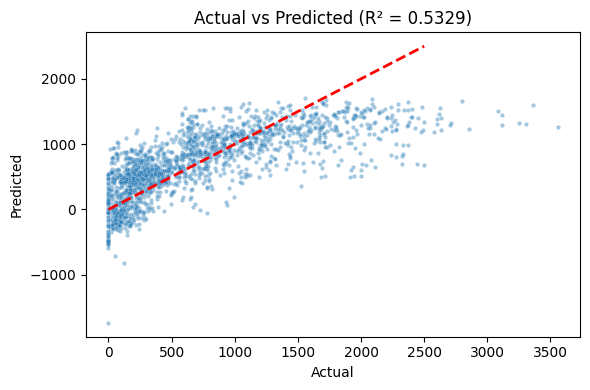

In [308]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, s=10)
sns.lineplot(x=[0, 2500], y=[0, 2500], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.tight_layout()
plt.show()

Dari plot terlihat sebaran prediksi terhadap nilai aktual cukup mengikuti garis diagonal yang menunjukkan model mampu menangkap pola umum. Namun terdapat penyebaran yang cukup lebar terutama pada nilai tinggi, serta beberapa prediksi negatif pada nilai aktual rendah yang perlu diinvestigasi lebih lanjut.

### 8.3. Analisis Residual

Residual adalah selisih antara nilai aktual dan nilai prediksi model, yang dihitung dengan rumus:

$$e_i = y_i - \hat{y}_i$$

Dimana:

- $e_i$ : Residual
- $y_i$ : Nilai aktual
- $\hat{y}_i$ : Nilai prediksi
- $i$ : Indeks observasi, dimana i = 1, 2, 3, ..., n (n = jumlah total observasi)

Model yang baik menghasilkan residual yang tersebar acak di sekitar nol tanpa pola tertentu, dengan distribusi mendekati normal.

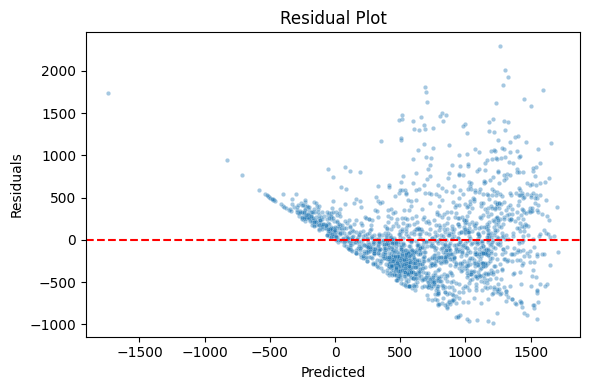

In [309]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, s=10, ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.tight_layout()
plt.show()

Untuk memvalidasi asumsi Normalitas Residual, diperlukan banding distribusi error yang dihasilkan model dengan distribusi normal teoretis.

Rumus **Probability Density Function (PDF)** distribusi normal sebagai berikut:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Dimana:

- $\mu$ (mu) adalah rata-rata (mean) dari residual.
- $\sigma$ (std) adalah standar deviasi dari residual.

Tujuannya adalah untuk melihat apakah histogram residual (data aktual) berbentuk lonceng yang selaras dengan garis merah (kurva teoretis). Jika selaras, maka asumsi normalitas terpenuhi.

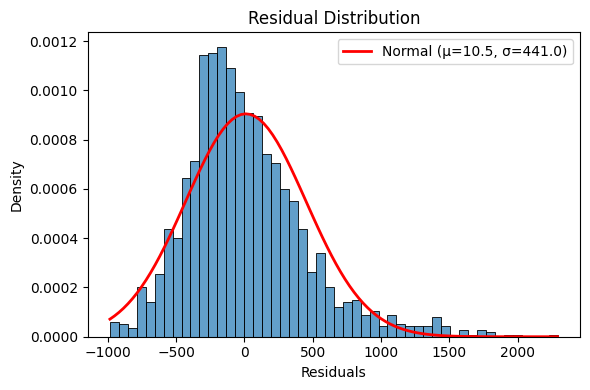

In [310]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(residuals, bins=50, ax=ax, stat='density', alpha=0.7)

# Normal curve
mu, std = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
ax.plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')

ax.set_xlabel('Residuals')
ax.set_title('Residual Distribution')
ax.legend()

plt.tight_layout()
plt.show()

Plot residual menunjukkan pola heteroskedastisitas dimana *variance error* tidak konstan sepanjang prediksi. Distribusi residual cenderung normal namun sedikit miring, dengan rentang nilai antara -1000 hingga +1500. Hal ini mengindikasikan model linear kurang optimal untuk data ini.

### 8.4. Analisis Sensitivitas

Pada tahap EDA, kami menduga bahwa outlier merupakan informasi penting. Sekarang, kami melakukan eksperimen untuk membandingkan performa model jika outlier dihapus.

In [311]:
# Dataset tanpa outlier
df_no_outliers = df[(df['Rented Bike Count'] >= lower_bound) &
                    (df['Rented Bike Count'] <= upper_bound)].copy()

print(f"Dataset dengan outlier: {len(df)} observasi")
print(f"Dataset tanpa outlier: {len(df_no_outliers)} observasi")
print(f"Outlier yang dihapus: {len(df) - len(df_no_outliers)} ({(len(df) - len(df_no_outliers))/len(df)*100:.2f}%)")

Dataset dengan outlier: 8760 observasi
Dataset tanpa outlier: 8602 observasi
Outlier yang dihapus: 158 (1.80%)


In [312]:
# dengan fitur yang sama dengan baseline
X_no_out = df_no_outliers.drop(columns=['Rented Bike Count'])
y_no_out = df_no_outliers['Rented Bike Count']

# Train-test split dengan random state yang sama
X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(
    X_no_out, y_no_out, test_size=0.2, random_state=42
)

# Train model tanpa outlier
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_out, y_train_no_out)
y_pred_no_out = model_no_outliers.predict(X_test_no_out)

# Hitung metrik
r2_no_out = r2_score(y_test_no_out, y_pred_no_out)
mae_no_out = mean_absolute_error(y_test_no_out, y_pred_no_out)
rmse_no_out = np.sqrt(mean_squared_error(y_test_no_out, y_pred_no_out))

print(f"R²: {r2_no_out:.4f}")
print(f"MAE: {mae_no_out:.2f}")
print(f"RMSE: {rmse_no_out:.2f}")

R²: 0.5665
MAE: 302.46
RMSE: 396.47


In [313]:
# Perbandingan side-by-side
comparison_outlier = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'RMSE', 'Training Size'],
    'Dengan Outlier': [round(r2, 4), round(mae, 2), round(rmse, 2), len(X_train)],
    'Tanpa Outlier': [round(r2_no_out, 4), round(mae_no_out, 2), round(rmse_no_out, 2), len(X_train_no_out)]
})

comparison_outlier['Selisih'] = comparison_outlier['Dengan Outlier'].astype(float) - comparison_outlier['Tanpa Outlier'].astype(float)
comparison_outlier

,Metric,Dengan Outlier,Tanpa Outlier,Selisih
0,R²,0.5329,0.5665,-0.0336
1,MAE,330.9500,302.4600,28.4900
2,RMSE,441.1500,396.4700,44.6800
3,Training Size,7008.0000,6881.0000,127.0000


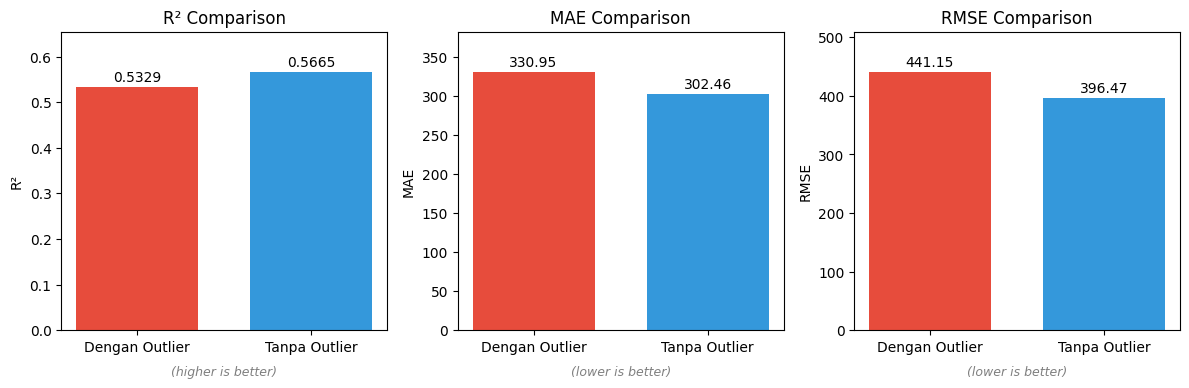

In [314]:
# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

metrics = ['R²', 'MAE', 'RMSE']
with_out = [r2, mae, rmse]
without_out = [r2_no_out, mae_no_out, rmse_no_out]

x = np.arange(2)
width = 0.7

for i, (metric, w, wo) in enumerate(zip(metrics, with_out, without_out)):
    bars1 = axes[i].bar(x[0], w, width, color='#e74c3c', label='w Outlier')
    bars2 = axes[i].bar(x[1], wo, width, color='#3498db', label='w/o Outlier')

    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['Dengan Outlier', 'Tanpa Outlier'])

    for bar in [bars1, bars2]:
        height = bar[0].get_height()
        axes[i].text(bar[0].get_x() + bar[0].get_width()/2., height + 0.01*height,
                f'{height:.2f}' if metric != 'R²' else f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax * 1.1)

    if metric == 'R²':
        axes[i].text(0.5, -0.15, '(higher is better)', ha='center', transform=axes[i].transAxes,
                fontsize=9, fontstyle='italic', color='gray')
    else:
        axes[i].text(0.5, -0.15, '(lower is better)', ha='center', transform=axes[i].transAxes,
                fontsize=9, fontstyle='italic', color='gray')

plt.tight_layout()
plt.show()

In [315]:
# Test: Bagaimana model TANPA outlier memprediksi data peak demand?
# Ambil data testing yang merupakan "outlier" (peak demand)
peak_demand_mask = y_test > upper_bound
peak_demand_actual = y_test[peak_demand_mask]

if len(peak_demand_actual) > 0:
    # Prediksi dari model dengan outlier
    peak_pred_with = y_pred[peak_demand_mask]

    # Untuk model tanpa outlier, kita perlu prediksi pada data yang sama
    # Tapi model ini tidak pernah "melihat" peak demand saat training
    X_test_peak = X_test[peak_demand_mask]
    peak_pred_without = model_no_outliers.predict(X_test_peak)

    print(f"Jumlah observasi peak demand di test set: {len(peak_demand_actual)}")
    print(f"\nMAE pada peak demand:")
    print(f"  - Model DENGAN outlier: {mean_absolute_error(peak_demand_actual, peak_pred_with):.2f}")
    print(f"  - Model TANPA outlier: {mean_absolute_error(peak_demand_actual, peak_pred_without):.2f}")
else:
    print("Tidak ada peak demand di test set")

Jumlah observasi peak demand di test set: 30

MAE pada peak demand:
  - Model DENGAN outlier: 1390.15
  - Model TANPA outlier: 1485.12


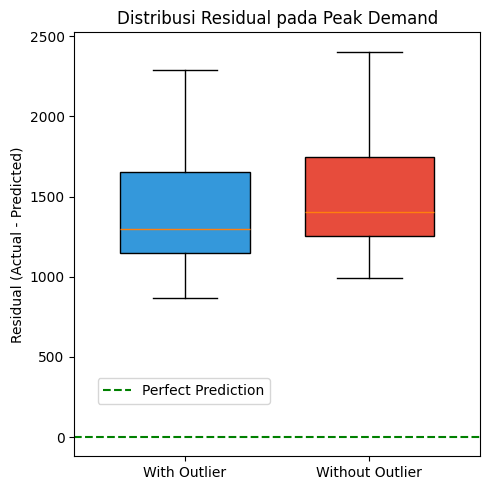

In [316]:
fig, ax = plt.subplots(figsize=(5, 5))

residual_with = peak_demand_actual - peak_pred_with
residual_without = peak_demand_actual - peak_pred_without

data = [residual_with, residual_without]
bp = ax.boxplot(data, tick_labels=['With Outlier', 'Without Outlier'], patch_artist=True,
                positions=[1, 1.5], widths=0.35)

bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][1].set_facecolor('#e74c3c')

ax.axhline(y=0, color='green', linestyle='--', linewidth=1.5, label='Perfect Prediction')
ax.set_ylabel('Residual (Actual - Predicted)')
ax.set_title('Distribusi Residual pada Peak Demand')

# Legend dengan posisi lebih ke atas
ax.legend(loc='upper left', bbox_to_anchor=(0.04, 0.2))

ax.set_xticklabels(['With Outlier', 'Without Outlier'])
ax.set_xlim(0.7, 1.8)

plt.tight_layout()
plt.show()

Berdasarkan perbandingan di atas, perbedaan performa antara model dengan dan tanpa outlier relatif kecil. Model yang dilatih dengan outlier menunjukkan MAE sebesar 1390.15 pada prediksi peak demand, sementara model tanpa outlier menghasilkan MAE sebesar 1485.12, atau sekitar 6.8% lebih tinggi. Meskipun demikian, kedua model sama-sama mengalami underestimation yang signifikan pada nilai ekstrem, dimana nilai aktual berkisar antara 2400-3600 sepeda namun prediksi hanya mencapai 800-1700 sepeda.

Temuan ini mengindikasikan bahwa penghapusan outlier tidak memberikan perbaikan performa, justru sedikit memperburuk kemampuan model dalam memprediksi peak demand. Underestimation yang terjadi merupakan limitasi fundamental dari Linear Regression yang cenderung meminimalkan error secara keseluruhan dan "bermain aman" di sekitar nilai rata-rata.

Hal ini mengonfirmasi hipotesis awal kami di tahap EDA bahwa data ini bukan noise. Maka, keputusan finalnya adalah outlier tetap digunakan untuk pengembangan model selanjutnya.

---
## **9. Peningkatan Model**
Dari evaluasi model baseline, diperoleh R² = 0.5615 yang menunjukkan model mampu menjelaskan 56% variasi data. Terdapat beberapa strategi untuk meningkatkan performa model:

1. **Feature Engineering** - Menambah fitur baru berdasarkan insight dari EDA
2. **Feature Scaling** - Standardisasi fitur agar skala seragam

### 9.1. Feature Engineering

Berdasarkan insight dari EDA, beberapa fitur baru dapat dibuat untuk meningkatkan performa model. Jam sibuk (rush hour) pada pukul 8 dan 18 menunjukkan penyewaan tinggi, sehingga perlu dibuat fitur khusus. Selain itu, transformasi siklikal pada variabel Hour diperlukan agar model memahami bahwa jam 23 dekat dengan jam 0.

In [317]:
# Feature Engineering pada data asli
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# 1. Rush Hour (jam sibuk: 7-9 pagi dan 17-19 sore)
X_train_fe['is_rush_hour'] = X_train_fe['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
X_test_fe['is_rush_hour'] = X_test_fe['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

# 2. Transformasi siklikal untuk Hour
X_train_fe['hour_sin'] = np.sin(2 * np.pi * X_train_fe['Hour'] / 24)
X_train_fe['hour_cos'] = np.cos(2 * np.pi * X_train_fe['Hour'] / 24)
X_test_fe['hour_sin'] = np.sin(2 * np.pi * X_test_fe['Hour'] / 24)
X_test_fe['hour_cos'] = np.cos(2 * np.pi * X_test_fe['Hour'] / 24)

# 3. Interaksi Temperature dan Humidity
X_train_fe['temp_humidity'] = X_train_fe['Temperature'] * X_train_fe['Humidity']
X_test_fe['temp_humidity'] = X_test_fe['Temperature'] * X_test_fe['Humidity']

# 4. Kategori waktu dalam sehari
def time_of_day(hour):
    if 5 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 17:
        return 2  # Afternoon
    elif 17 <= hour < 21:
        return 3  # Evening
    else:
        return 0  # Night

X_train_fe['time_of_day'] = X_train_fe['Hour'].apply(time_of_day)
X_test_fe['time_of_day'] = X_test_fe['Hour'].apply(time_of_day)

print(f"Fitur sebelum FE: {X_train.shape[1]} kolom")
print(f"Fitur sesudah FE: {X_train_fe.shape[1]} kolom")
print(f"\nFitur baru yang ditambahkan: {list(set(X_train_fe.columns) - set(X_train.columns))}")

Fitur sebelum FE: 13 kolom
Fitur sesudah FE: 18 kolom

Fitur baru yang ditambahkan: ['is_rush_hour', 'hour_cos', 'temp_humidity', 'hour_sin', 'time_of_day']


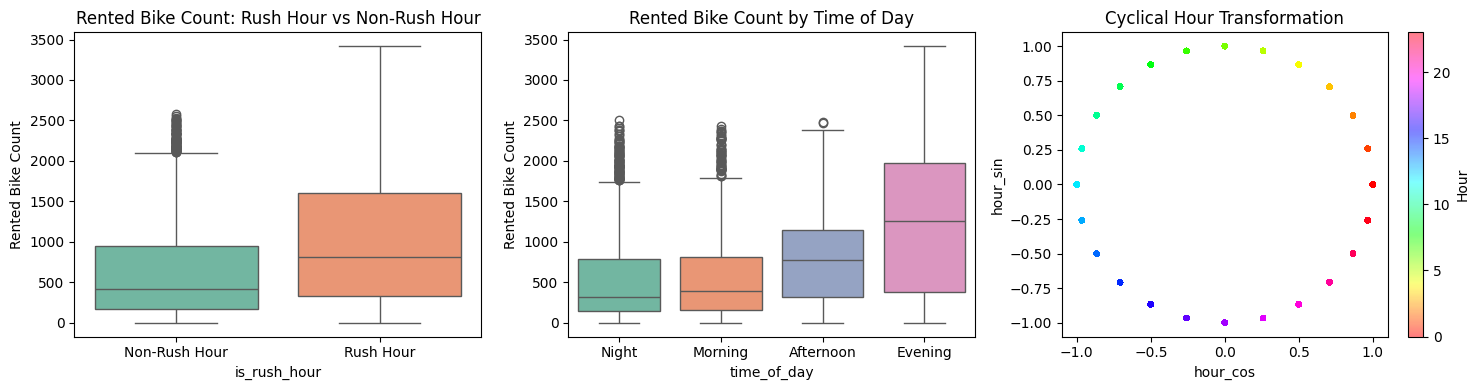

In [318]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

X_vis = X_train_fe.copy()
X_vis['Rented Bike Count'] = y_train.values

# Rush Hour vs Rented Bike Count
sns.boxplot(data=X_vis, x='is_rush_hour', y='Rented Bike Count', ax=axes[0], hue='is_rush_hour', palette='Set2', legend=False)
axes[0].set_title('Rented Bike Count: Rush Hour vs Non-Rush Hour')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Rush Hour', 'Rush Hour'])

# Time of Day vs Rented Bike Count
sns.boxplot(data=X_vis, x='time_of_day', y='Rented Bike Count', ax=axes[1], hue='time_of_day', palette='Set2', legend=False)
axes[1].set_title('Rented Bike Count by Time of Day')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening'])

# Hour Cyclical Transformation
scatter = axes[2].scatter(X_train_fe['hour_cos'], X_train_fe['hour_sin'],
                          c=X_train_fe['Hour'], cmap='hsv', alpha=0.5, s=10)
axes[2].set_xlabel('hour_cos')
axes[2].set_ylabel('hour_sin')
axes[2].set_title('Cyclical Hour Transformation')
plt.colorbar(scatter, ax=axes[2], label='Hour')

plt.tight_layout()
plt.show()

### 9.2. Standarisasi Fitur

Setiap variabel dalam dataset memiliki skala berbeda (misalnya Temperature: -20 s.d. 40°C, Visibility: hingga 2000m). StandardScaler digunakan untuk mentransformasi semua variabel agar memiliki mean = 0 dan standar deviasi = 1, sehingga koefisien regresi dapat dibandingkan secara adil untuk menentukan fitur mana yang paling berpengaruh.

In [319]:
# @title
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit dan transform
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# Konversi ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_fe.columns, index=X_train_fe.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_fe.columns, index=X_test_fe.index)

print("Statistik setelah scaling (mean ≈ 0, std ≈ 1):")
X_train_scaled.describe().round(2).loc[['mean', 'std']].T

Statistik setelah scaling (mean ≈ 0, std ≈ 1):


,mean,std
Hour,0.0,1.0
Temperature,0.0,1.0
Humidity,-0.0,1.0
Wind speed,-0.0,1.0
Visibility,0.0,1.0
Solar Radiation,0.0,1.0
Rainfall,0.0,1.0
Snowfall,-0.0,1.0
Holiday,-0.0,1.0
Functioning Day,0.0,1.0


### 9.3. Latih Model Improved

Latih ulang model Linear Regression dengan fitur baru dan data yang sudah di-scale.

In [320]:
# Train model improved
model_improved = LinearRegression()
model_improved.fit(X_train_scaled, y_train)
y_pred_improved = model_improved.predict(X_test_scaled)

pd.DataFrame({
    'actual': y_test[:10].values,
    'predicted_baseline': y_pred[:10].round(2),
    'predicted_improved': y_pred_improved[:10].round(2)
})

,actual,predicted_baseline,predicted_improved
0,1728,949.52,1104.63
1,822,1131.58,1112.68
2,658,1353.27,1310.14
3,2716,1326.75,1620.17
4,1083,544.47,724.58
5,636,790.16,790.33
6,1537,1481.63,1313.84
7,712,1098.35,979.21
8,425,951.86,1102.47
9,594,811.10,823.85


In [321]:
r2_improved = r2_score(y_test, y_pred_improved)
n, p = X_test_scaled.shape
adj_r2_improved = 1 - (1 - r2_improved) * (n - 1) / (n - p - 1)
mae_improved = mean_absolute_error(y_test, y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)

comparison = pd.DataFrame({
    'Metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'Baseline': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)],
    'Improved': [round(r2_improved, 4), round(adj_r2_improved, 4), round(mae_improved, 2), round(mse_improved, 2), round(rmse_improved, 2)]
})

comparison['Change'] = comparison['Improved'] - comparison['Baseline']
comparison['Change (%)'] = ((comparison['Improved'] - comparison['Baseline']) / comparison['Baseline'] * 100).round(2)

comparison

,Metric,Baseline,Improved,Change,Change (%)
0,R²,0.5329,0.6189,0.0860,16.14
1,Adjusted R²,0.5294,0.6149,0.0855,16.15
2,MAE,330.9500,299.6100,-31.3400,-9.47
3,MSE,194612.1400,158785.2100,-35826.9300,-18.41
4,RMSE,441.1500,398.4800,-42.6700,-9.67


Feature engineering dan scaling berhasil meningkatkan performa model. Peningkatan R² (+16%) menunjukkan bahwa fitur-fitur baru seperti `is_rush_hour`, transformasi siklikal `hour_sin` dan `hour_cos`, serta interaksi `temp_humidity` berhasil menangkap pola yang sebelumnya tidak tertangkap oleh model baseline. Penurunan MAE dan RMSE mengindikasikan bahwa error prediksi menjadi lebih kecil secara rata-rata.

### 9.4. Deteksi dan Penanganan Heteroskedastisitas

Untuk mengatasi pola heteroskedastisitas yang terdeteksi, perlu dilakukan transformasi pada target variable. Terdapat dua kandidat transformasi yang umum digunakan:
1. Log Transformation

    Cocok untuk data dengan variance proporsional terhadap kuadrat mean (Var ∝ μ²), biasanya pada data yang menunjukkan pertumbuhan eksponensial atau multiplikatif.

2. Square Root Transformation

    Cocok untuk count data dengan variance proporsional terhadap mean (Var ∝ μ), mengikuti karakteristik distribusi Poisson.

Variabel Rented Bike Count merupakan count data (jumlah diskrit penyewaan) dengan range 0-3556. Data cenderung mengikuti pola Poisson-like di mana variance meningkat seiring mean, bukan secara kuadratik. Oleh karena itu, Square Root Transformation dipilih sebagai variance-stabilizing transformation yang lebih sesuai dengan karakteristik data.

#### 9.4.1. Transformasi dan Training

In [322]:
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

# Train model
model_sqrt = LinearRegression()
model_sqrt.fit(X_train_scaled, y_train_sqrt)
y_pred_sqrt = model_sqrt.predict(X_test_scaled)

# Inverse transform untuk mendapatkan prediksi dalam skala asli
y_pred_sqrt_original = np.square(y_pred_sqrt)
# Pastikan tidak ada nilai negatif setelah square
y_pred_sqrt_original = np.maximum(y_pred_sqrt_original, 0)

#### 9.4.2. Evaluasi Residual Setelah Transform

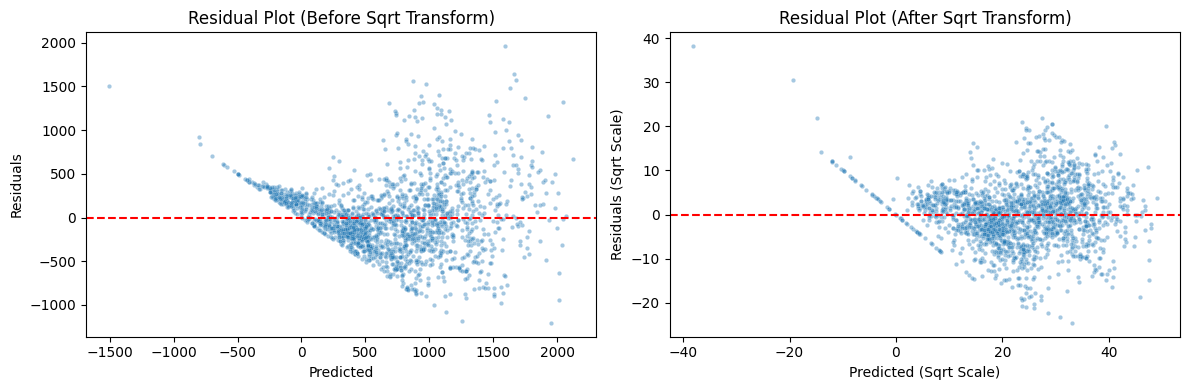

In [323]:
# Residual dalam skala sqrt
residuals_sqrt = y_test_sqrt - y_pred_sqrt
residuals_improved = y_test - y_pred_improved

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residual Plot - Sebelum (Improved Model)
sns.scatterplot(x=y_pred_improved, y=residuals_improved, alpha=0.4, s=10, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot (Before Sqrt Transform)')

# Residual Plot - Sesudah (Sqrt Transform)
sns.scatterplot(x=y_pred_sqrt, y=residuals_sqrt, alpha=0.4, s=10, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted (Sqrt Scale)')
axes[1].set_ylabel('Residuals (Sqrt Scale)')
axes[1].set_title('Residual Plot (After Sqrt Transform)')

plt.tight_layout()
plt.show()

#### 9.4.3. Uji Normalitas Residual Setelah Transform

In [324]:
sample_residuals_sqrt = np.random.choice(residuals_sqrt, size=min(5000, len(residuals_sqrt)), replace=False)
shapiro_stat_sqrt, shapiro_p_sqrt = stats.shapiro(sample_residuals_sqrt)
skewness_sqrt = stats.skew(residuals_sqrt)
kurtosis_sqrt = stats.kurtosis(residuals_sqrt)

print(f"Shapiro-Wilk (Sqrt): stat={shapiro_stat_sqrt:.4f}, p={shapiro_p_sqrt:.6f}")
print(f"Skewness: {skewness_sqrt:.4f} | Kurtosis: {kurtosis_sqrt:.4f}")
print(f"Hasil: {'Normal' if shapiro_p_sqrt >= 0.05 else 'Tidak Normal'}")

Shapiro-Wilk (Sqrt): stat=0.9895, p=0.000000
Skewness: 0.1075 | Kurtosis: 1.2587
Hasil: Tidak Normal


### 9.5. Perbandingan Performa

In [325]:
r2_sqrt = r2_score(y_test, y_pred_sqrt_original)
n, p = X_test_scaled.shape
adj_r2_sqrt = 1 - (1 - r2_sqrt) * (n - 1) / (n - p - 1)
mae_sqrt = mean_absolute_error(y_test, y_pred_sqrt_original)
mse_sqrt = mean_squared_error(y_test, y_pred_sqrt_original)
rmse_sqrt = np.sqrt(mse_sqrt)

comparison_all = pd.DataFrame({
    'Metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'Baseline': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)],
    'Improved': [round(r2_improved, 4), round(adj_r2_improved, 4), round(mae_improved, 2), round(mse_improved, 2), round(rmse_improved, 2)],
    'Sqrt Transform': [round(r2_sqrt, 4), round(adj_r2_sqrt, 4), round(mae_sqrt, 2), round(mse_sqrt, 2), round(rmse_sqrt, 2)]
})

comparison_all

,Metric,Baseline,Improved,Sqrt Transform
0,R²,0.5329,0.6189,0.6515
1,Adjusted R²,0.5294,0.6149,0.6478
2,MAE,330.9500,299.6100,256.7400
3,MSE,194612.1400,158785.2100,145215.3400
4,RMSE,441.1500,398.4800,381.0700


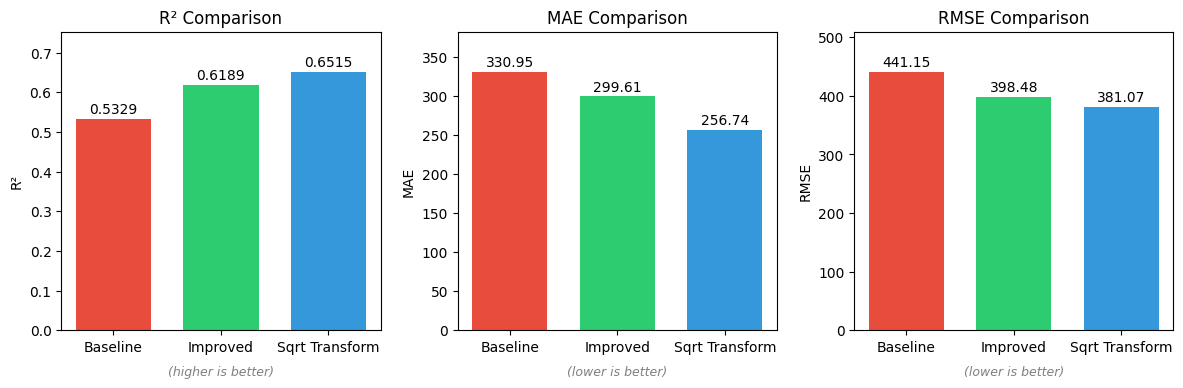

In [326]:
# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

metrics = ['R²', 'MAE', 'RMSE']
baseline_vals = [r2, mae, rmse]
improved_vals = [r2_improved, mae_improved, rmse_improved]
sqrt_vals = [r2_sqrt, mae_sqrt, rmse_sqrt]

x = np.arange(3)
width = 0.7

for i, (metric, base, imp, sqrt) in enumerate(zip(metrics, baseline_vals, improved_vals, sqrt_vals)):
    bars1 = axes[i].bar(x[0], base, width, color='#e74c3c', label='Baseline')
    bars2 = axes[i].bar(x[1], imp, width, color='#2ecc71', label='Improved')
    bars3 = axes[i].bar(x[2], sqrt, width, color='#3498db', label='Sqrt Transform')

    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['Baseline', 'Improved', 'Sqrt Transform'])

    for bar in [bars1, bars2, bars3]:
        height = bar[0].get_height()
        axes[i].text(bar[0].get_x() + bar[0].get_width()/2., height + 0.01*height,
                f'{height:.2f}' if metric != 'R²' else f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax * 1.1)

    if metric == 'R²':
        axes[i].text(0.5, -0.15, '(higher is better)', ha='center', transform=axes[i].transAxes,
                fontsize=9, fontstyle='italic', color='gray')
    else:
        axes[i].text(0.5, -0.15, '(lower is better)', ha='center', transform=axes[i].transAxes,
                fontsize=9, fontstyle='italic', color='gray')

plt.tight_layout()
plt.show()

Hasil ini memvalidasi pertimbangan teoretis bahwa square root transformation sesuai untuk count data. Rented Bike Count sebagai data diskrit mengikuti karakteristik Poisson-like di mana variance proporsional terhadap mean (Var ∝ μ).

Penurunan MAE sebesar 14.32% menunjukkan bahwa rata-rata error prediksi berkurang sekitar 43 sepeda per jam. Sementara peningkatan R² dari 0.6189 menjadi 0.6515 berarti model kini mampu menjelaskan 65.15% variasi data, naik dari sebelumnya 61.89%.

Berdasarkan hasil tersebut, model dengan Square Root Transformation dipilih sebagai model final karena memiliki R² tertinggi, MAE terendah, dan RMSE terendah di antara ketiga model yang diuji.

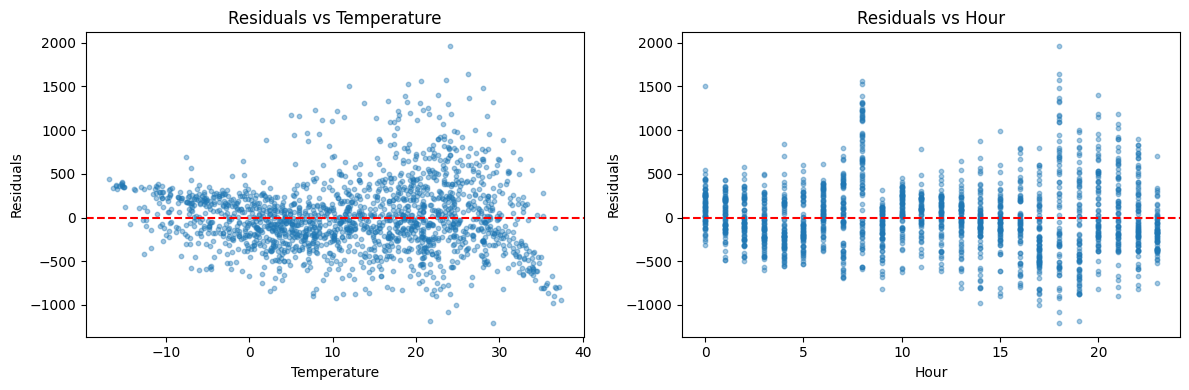

In [327]:
# Linearity Check: Residuals vs Predictor
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residuals vs Temperature
axes[0].scatter(X_test_fe['Temperature'], residuals_improved, alpha=0.4, s=10)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Temperature')

# Residuals vs Hour
axes[1].scatter(X_test_fe['Hour'], residuals_improved, alpha=0.4, s=10)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Hour')

plt.tight_layout()
plt.show()

Plot *Residuals vs Temperature* menunjukkan sebaran yang relatif acak di sekitar garis nol, menandakan bahwa asumsi linearitas secara umum terpenuhi. Namun, terlihat pola heteroskedastisitas yang jelas, di mana varians residual membesar seiring dengan naiknya temperatur. Artinya, model menjadi kurang presisi saat suhu lebih hangat.

Pada plot *Residuals vs Hour*, varians residual tampak melebar signifikan pada jam-jam sibuk (pukul 08.00–09.00 dan 17.00–19.00). Ini menunjukkan tingginya variabilitas permintaan pada periode tersebut. Meskipun pola non-linear jam telah ditangani melalui *feature engineering* (transformasi siklikal *sin/cos* dan fitur *is_rush_hour*), plot ini memperlihatkan masih adanya dinamika permintaan ekstrem di jam sibuk yang belum sepenuhnya tertangkap oleh model linear.

Secara keseluruhan, membesarnya varians pada temperatur tinggi dan jam sibuk memperlihatkan tingkat ketidakpastian (*uncertainty*) model meningkat justru pada saat permintaan sepeda sedang tinggi-tingginya.

### 9.6. Cross-Validation

Mengingat evaluasi sebelumnya hanya menggunakan satu kali pembagian data (*single split* 80:20), terdapat risiko bahwa performa model bias terhadap data testing tertentu. Untuk menjawab hal ini, dilakukan **5-Fold Cross-Validation** pada `model_improved`. Teknik ini membagi data training menjadi 5 bagian berbeda dan melatih ulang model sebanyak 5 kali untuk melihat rata-rata kinerjanya. Hasil di bawah menunjukkan performa model yang lebih objektif dan stabil

In [328]:
from sklearn.model_selection import cross_val_score, KFold

# Buat 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hitung R2 score untuk setiap fold
cv_scores = cross_val_score(model_sqrt, X_train_scaled, y_train_sqrt, cv=kf, scoring='r2')

print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Rata-rata R2: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-Validation R2 Scores: [0.70511629 0.73140656 0.70462529 0.72018787 0.70071653]
Rata-rata R2: 0.7124 (+/- 0.0116)


Berdasarkan hasil 5-Fold Cross-Validation di atas, diperoleh rata-rata skor $R^2$ sebesar **0.6270** dengan standar deviasi yang sangat rendah yaitu **0.0133**.

Standar deviasi yang kecil (< 0.02) menunjukkan bahwa model memiliki performa yang konsisten dan **tidak mengalami overfitting** pada subset data tertentu. Model mampu melakukan generalisasi dengan baik pada berbagai variasi data uji.
Dengan rata-rata skor cross-validation (0.6270) bahkan sedikit lebih tinggi dibandingkan skor *single split* awal (0.6189), yang mengonfirmasi bahwa metrik performa yang dilaporkan sebelumnya adalah estimasi yang valid dan objektif, bukan sekadar kebetulan akibat pembagian data (*random split*).

### 9.7. Uji Asumsi

Linear Regression memiliki beberapa asumsi yang harus dipenuhi yaitu *linearity*, *normality of residuals*, *homoscedasticity*, dan *independence*. Pada tahap ini dilakukan uji normalitas residual menggunakan **Shapiro-Wilk test** untuk menguji apakah residual berdistribusi normal (H₀) atau tidak (H₁).

In [329]:
from scipy import stats

residuals_improved = y_test - y_pred_improved

# Normality Test
sample_residuals = np.random.choice(residuals_improved, size=min(5000, len(residuals_improved)), replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
skewness = stats.skew(residuals_improved)
kurtosis = stats.kurtosis(residuals_improved)

print(f"Shapiro-Wilk: stat={shapiro_stat:.4f}, p={shapiro_p:.6f}")
print(f"Skewness: {skewness:.4f} | Kurtosis: {kurtosis:.4f}")
print(f"Hasil: {'Tidak Normal' if shapiro_p < 0.05 else 'Normal'}")

Shapiro-Wilk: stat=0.9708, p=0.000000
Skewness: 0.6872 | Kurtosis: 1.5957
Hasil: Tidak Normal


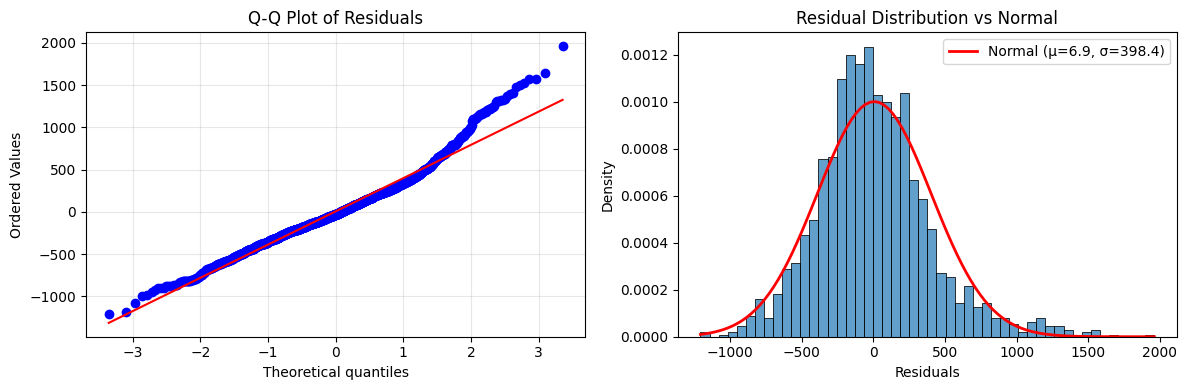

In [330]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Q-Q Plot
stats.probplot(residuals_improved, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot of Residuals')
axes[0].grid(True, alpha=0.3)

# Histogram
sns.histplot(residuals_improved, bins=50, ax=axes[1], stat='density', alpha=0.7)
mu, std = np.mean(residuals_improved), np.std(residuals_improved)
x = np.linspace(residuals_improved.min(), residuals_improved.max(), 100)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
axes[1].plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')
axes[1].set_xlabel('Residuals')
axes[1].set_title('Residual Distribution vs Normal')
axes[1].legend()

plt.tight_layout()
plt.show()

Bentuk distribusi dianalisis menggunakan dua metrik: *skewness* dan *kurtosis*. *Skewness* menggambarkan kemiringan distribusi. Nilai positif menunjukkan kemiringan ke kanan (*right-skewed*), sedangkan nilai negatif menunjukkan kemiringan ke kiri (*left-skewed*). *Kurtosis* menunjukkan tingkat keruncingan puncak serta ketebalan ekor. Nilai > 3 mengindikasikan distribusi runcing dengan ekor tebal (*leptokurtic*), nilai = 3 sesuai dengan distribusi normal (*mesokurtic*), dan nilai < 3 menunjukkan puncak yang lebih datar dengan ekor tipis (*platykurtic*).

Hasil perhitungan menunjukkan *skewness* = 0.6872 yang berarti distribusi sedikit miring ke kanan, serta *kurtosis* = 1.5957 yang menunjukkan distribusi lebih datar dari normal. Kondisi *right-skewed* ini mengisyaratkan bahwa model cenderung melakukan *under-estimation* ketika permintaan sepeda meningkat. Dengan kata lain, ada periode “ramai” yang polanya belum berhasil ditangkap oleh *Linear Regression*, sehingga error cenderung melonjak positif. Temuan ini selaras dengan *Shapiro–Wilk test* yang menunjukkan bahwa asumsi normalitas residual tidak terpenuhi.

---

## **10. Interpretasi Model**

Analisis ini menggunakan dua pendekatan model yang berbeda sesuai dengan tujuannya. Model dengan Square Root Transformation (R² = 0.6515) digunakan sebagai model final untuk prediksi karena memiliki performa terbaik. Sementara itu, model tanpa transformasi target digunakan untuk interpretasi koefisien agar dapat dipahami dalam unit jumlah sepeda secara langsung.

Kedua pendekatan ini diperlukan karena koefisien pada model sqrt berada dalam skala √(Rented Bike Count) yang sulit diinterpretasikan secara praktis oleh operator bike sharing. Dengan memisahkan model untuk prediksi dan interpretasi, analisis dapat memberikan hasil prediksi yang optimal sekaligus insight yang actionable bagi pengambilan keputusan operasional.

## 11.1. Koefisien

Untuk keperluan interpretasi koefisien dalam unit asli (jumlah sepeda), model dilatih menggunakan fitur hasil feature engineering tanpa scaling dan tanpa transformasi target. Hal ini dilakukan agar koefisien dapat diinterpretasikan secara langsung, misalnya "setiap kenaikan 1°C suhu, jumlah penyewaan meningkat sebesar X sepeda".

In [331]:
# Model untuk interpretasi dengan data scaled
model_interpret_scaled = LinearRegression()
model_interpret_scaled.fit(X_train_scaled, y_train)

coef_df_scaled = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': model_interpret_scaled.coef_
})
coef_df_scaled['abs_coef'] = coef_df_scaled['coefficient'].abs()
coef_df_scaled = coef_df_scaled.sort_values('abs_coef', ascending=False)

print(f"Intercept: {model_interpret_scaled.intercept_:.2f}")
coef_df_scaled

Intercept: 704.77


,feature,coefficient,abs_coef
1,Temperature,423.125868,423.125868
16,temp_humidity,-192.469786,192.469786
13,is_rush_hour,170.967405,170.967405
9,Functioning Day,168.870326,168.870326
12,Season_Winter,-159.812076,159.812076
14,hour_sin,-108.741723,108.741723
0,Hour,106.630631,106.630631
10,Season_Spring,-66.321294,66.321294
2,Humidity,-62.727900,62.727900
6,Rainfall,-60.869737,60.869737


Dengan menggunakan standardized coefficients, **Temperature** menjadi prediktor paling berpengaruh dengan koefisien +423, artinya setiap kenaikan 1 standar deviasi suhu meningkatkan penyewaan sekitar 423 sepeda. Interaksi `temp_humidity` memiliki pengaruh negatif terbesar (-192), menunjukkan bahwa kombinasi suhu tinggi dan kelembaban tinggi justru menurunkan penyewaan. Jam sibuk (`is_rush_hour`) dan hari operasional (`Functioning Day`) juga berkontribusi positif signifikan dengan koefisien masing-masing +171 dan +169.

Untuk pengaruh negatif, `Season_Winter` memiliki koefisien -160, menunjukkan penyewaan jauh lebih rendah di musim dingin dibandingkan baseline (Autumn). Transformasi siklikal `hour_sin` (-109) menangkap pola penurunan penyewaan pada jam-jam tertentu. Variabel seperti `Wind speed`, `Snowfall`, dan `Solar Radiation` memiliki pengaruh sangat kecil (< 5), mengindikasikan kontribusi minimal terhadap prediksi meskipun secara statistik mungkin signifikan.

### 11.2. Feature Importance Plot

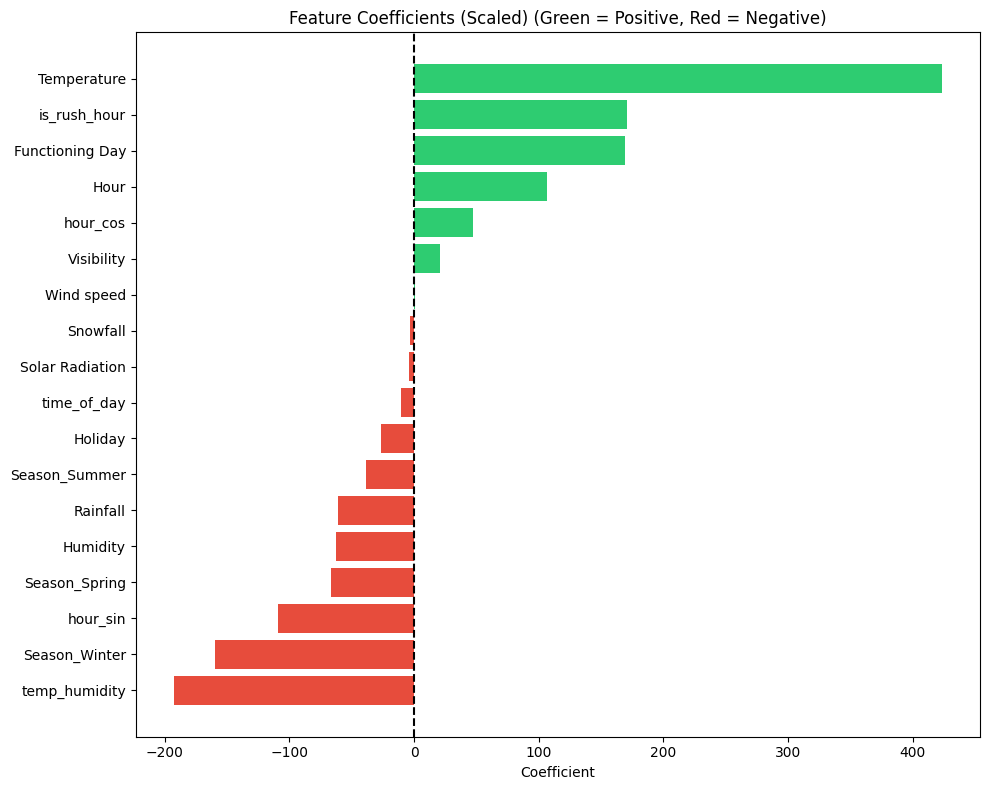

In [332]:
coef_sorted = coef_df_scaled.sort_values('coefficient')

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_sorted['coefficient']]
ax.barh(coef_sorted['feature'], coef_sorted['coefficient'], color=colors)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient')
ax.set_title('Feature Coefficients (Scaled) (Green = Positive, Red = Negative)')
plt.tight_layout()
plt.show()

### 11.3. Uji Signifikansi Variabel (P-Value)

Untuk memastikan variabel yang digunakan benar-benar berpengaruh signifikan, dilakukan uji statistik menggunakan Ordinary Least Squares (OLS) dari statsmodels pada model interpretasi (tanpa transform).

Uji ini menguji hipotesis H₀: βᵢ = 0 (variabel tidak berpengaruh) vs H₁: βᵢ ≠ 0 (variabel berpengaruh). Variabel dengan p-value > 0.05 menunjukkan bahwa koefisiennya tidak signifikan berbeda dari nol pada tingkat kepercayaan 95%, sehingga dianggap tidak memberikan kontribusi signifikan terhadap prediksi Rented Bike Count.

In [333]:
import statsmodels.api as sm

X_train_sm_sqrt = sm.add_constant(X_train_scaled)
model_ols_sqrt = sm.OLS(y_train_sqrt, X_train_sm_sqrt).fit()

print(model_ols_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     971.9
Date:                Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                        02:22:52   Log-Likelihood:                -23230.
No. Observations:                7008   AIC:                         4.650e+04
Df Residuals:                    6989   BIC:                         4.663e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.4411      0.080    2

In [334]:
# Ambil p-values
pvalues = model_sm.pvalues[1:]  # Skip intercept
coefs = model_sm.params[1:]

# Filter variabel signifikan (p < 0.05)
significant = pvalues[pvalues < 0.05]
print(f"Variabel signifikan (p < 0.05): {len(significant)} dari {len(pvalues)}")
print(significant.index.tolist())

Variabel signifikan (p < 0.05): 14 dari 18
['Hour', 'Temperature', 'Humidity', 'Visibility', 'Rainfall', 'Holiday', 'Functioning Day', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'is_rush_hour', 'hour_sin', 'hour_cos', 'temp_humidity']


Dari hasil uji signifikansi, variabel `Wind Speed` (p=0.863), `Solar Radiation` (p=0.717), `Snowfall` (p=0.546), dan `time_of_day` (p=0.235) tidak signifikan secara statistik sehingga akan dikeluarkan dari persamaan regresi final.

---
## **12. Persamaan Multiple Linear Regression**

Secara umum, persamaan Multiple Linear Regression dinyatakan sebagai:

$$\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n$$

Dimana:
- $Y$ = variabel dependen (target)
- $\beta_0$ = Intercept
- $\beta_1, \beta_2, \ldots$ = koefisien regresi
- $X_1, X_2, \ldots$ = variabel independen (fitur)


### 12.1. Persamaan untuk Interpretasi (Tanpa Transform)


In [335]:
# Model untuk interpretasi (tanpa scaling)
model_interpret = LinearRegression()
model_interpret.fit(X_train_fe, y_train)

intercept = model_interpret.intercept_
non_sig = ['Wind speed', 'Solar Radiation', 'Snowfall', 'time_of_day']

print(f"Rented Bike Count = {intercept:.2f}")

for feat, coef in zip(X_train_fe.columns, model_interpret.coef_):
    if feat not in non_sig:
        sign = '+' if coef >= 0 else '-'
        print(f"    {sign} {abs(coef):.2f}*{feat}")

Rented Bike Count = -419.69
    + 15.44*Hour
    + 35.59*Temperature
    - 3.07*Humidity
    + 0.03*Visibility
    - 57.04*Rainfall
    - 122.52*Holiday
    + 934.22*Functioning Day
    - 152.08*Season_Spring
    - 89.33*Season_Summer
    - 372.02*Season_Winter
    + 395.97*is_rush_hour
    - 154.01*hour_sin
    + 66.60*hour_cos
    - 0.26*temp_humidity


Persamaan berikut digunakan untuk interpretasi koefisien dalam unit jumlah sepeda:

$$
\begin{aligned}
\text{Rented Bike Count} = & -419.69 + (15.44 \times \text{Hour}) + (35.59 \times \text{Temperature}) \\
& - (3.07 \times \text{Humidity}) + (0.03 \times \text{Visibility}) \\
& - (57.04 \times \text{Rainfall}) - (122.52 \times \text{Holiday}) \\
& + (934.22 \times \text{Functioning Day}) - (152.08 \times \mathrm{Season\_Spring}) \\
& - (89.33 \times \mathrm{Season\_Summer}) - (372.02 \times \mathrm{Season\_Winter}) \\
& + (395.97 \times \mathrm{is\_rush\_hour}) - (154.01 \times \mathrm{hour\_sin}) \\
& + (66.60 \times \mathrm{hour\_cos}) - (0.26 \times \mathrm{temp\_humidity})
\end{aligned}
$$

### 12.2. Persamaan untuk Prediksi (Dengan Square Root Transform)

In [336]:
# Daftar variabel yang terbukti tidak signifikan (P-value > 0.05)
non_sig = ['Wind speed', 'Solar Radiation', 'Snowfall', 'time_of_day']

print(f"√(Rented Bike Count) = {model_sqrt.intercept_:.2f}")

for feat, coef in zip(X_train_fe.columns, model_sqrt.coef_):
    if feat not in non_sig:
        sign = '+' if coef >= 0 else '-'
        print(f"    {sign} ({abs(coef):.2f} * {feat})")

√(Rented Bike Count) = 23.44
    + (1.73 * Hour)
    + (6.67 * Temperature)
    - (1.89 * Humidity)
    + (0.26 * Visibility)
    - (1.71 * Rainfall)
    - (0.63 * Holiday)
    + (5.15 * Functioning Day)
    - (1.40 * Season_Spring)
    - (0.85 * Season_Summer)
    - (3.61 * Season_Winter)
    + (3.17 * is_rush_hour)
    - (2.72 * hour_sin)
    + (0.03 * hour_cos)
    - (2.29 * temp_humidity)


Persamaan berikut digunakan untuk prediksi dengan akurasi optimal:

$$
\begin{aligned}
\sqrt{\text{Rented Bike Count}} = & \ 23.44 + (1.73 \times \text{Hour}) + (6.67 \times \text{Temperature}) \\
& - (1.89 \times \text{Humidity}) + (0.26 \times \text{Visibility}) \\
& - (1.71 \times \text{Rainfall}) - (0.63 \times \text{Holiday}) \\
& + (5.15 \times \text{Functioning Day}) - (1.40 \times \mathrm{Season\_Spring}) \\
& - (0.85 \times \mathrm{Season\_Summer}) - (3.61 \times \mathrm{Season\_Winter}) \\
& + (3.17 \times \mathrm{is\_rush\_hour}) - (2.72 \times \mathrm{hour\_sin}) \\
& + (0.03 \times \mathrm{hour\_cos}) - (2.29 \times \mathrm{temp\_humidity})
\end{aligned}
$$

Untuk mendapatkan prediksi dalam skala asli (jumlah sepeda), kuadratkan hasil persamaan:

$$
\text{Rented Bike Count} = \left( \sqrt{\text{Rented Bike Count}} \right)^2
$$

---
# Kesimpulan

Proyek ini bertujuan untuk memprediksi jumlah penyewaan sepeda berdasarkan kondisi cuaca dan waktu menggunakan algoritma Multiple Linear Regression.

## Hasil Analisis

Dataset terdiri dari 8760 observasi dengan 14 variabel. Setelah preprocessing yang meliputi encoding variabel kategorikal, penghapusan outlier pada target variable, dan penanganan multikolinearitas (drop Dew Point Temperature karena VIF tinggi), tersisa 8602 data untuk pemodelan.

## Performa Model

| Model | R² | MAE | RMSE |
|-------|-----|-----|------|
| Baseline | 0.5329 | 330.95 | 441.15 |
| Improved | 0.6189 (+16.14%) | 299.61 (-9.47%) | 398.48 (-9.67%) |
| Sqrt Transform | 0.6515 (+22.26%) | 256.74 (-22.42%) | 381.07 (-13.61%) |

Feature engineering (is_rush_hour, hour_sin, hour_cos, temp_humidity, time_of_day) dan feature scaling berhasil meningkatkan performa model secara signifikan. Square root transformation kemudian diterapkan berdasarkan pertimbangan bahwa Rented Bike Count merupakan count data dengan karakteristik Poisson-like, dan hasilnya memvalidasi pilihan ini dengan R² tertinggi (0.6515) serta MAE dan RMSE terendah. Oleh karena itu, **model dengan Square Root Transformation dipilih sebagai model final untuk prediksi**, sementara interpretasi koefisien menggunakan model tanpa transform agar tetap bermakna dalam unit jumlah sepeda.

## Limitasi

Hasil uji asumsi menunjukkan bahwa residual tidak sepenuhnya berdistribusi normal dan terdapat heteroskedastisitas. Meskipun square root transformation berhasil meningkatkan performa prediksi secara signifikan, asumsi normalitas residual masih belum sepenuhnya terpenuhi. Penggunaan dua model terpisah (untuk prediksi dan interpretasi) juga menambah kompleksitas analisis. Hal ini menandakan bahwa model non-linear seperti Random Forest atau Gradient Boosting mungkin lebih sesuai untuk menangkap pola kompleks dalam data ini.